In [1]:
pip install chess 

     ---------------------------------------- 0.0/156.5 kB ? eta -:--:--
     ----- ---------------------------------- 20.5/156.5 kB ? eta -:--:--
     ------- ----------------------------- 30.7/156.5 kB 435.7 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/156.5 kB 409.6 kB/s eta 0:00:01
     --------------------- --------------- 92.2/156.5 kB 525.1 kB/s eta 0:00:01
     ------------------------------------ 156.5/156.5 kB 668.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148535 sha256=784886f201f46e5c54b6d86ff67ab7e037e35339703694caadd0ba1d074fb26e
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\f0\3f\76\8783033e8524d407e1bebaf72fdd3f3eba27e0c030e92bbd87
Successfully built chess
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import chess
import chess.svg
import sys


In [5]:
import os
for dirname, _, filenames in os.walk('C:/Users/pc/Desktop/Chess'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/pc/Desktop/Chess\Nouveau Document texte.txt


In [7]:
data = pd.read_csv('C:/Users/pc/Downloads/lichess_puzzle_transformed.csv/lichess_puzzle_transformed.csv')

In [9]:
data.head()

,Unnamed: 0,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl
0,0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48
1,1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53
2,2,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1495,155,100,14,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105
3,3,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1652,149,100,23,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69
4,4,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K...,e3g3 f7f4 e5f4 f8f4,1478,279,100,10,crushing middlegame short,https://lichess.org/8sVpuwso#81


In [11]:
data['PuzzleId'].nunique()

2568096

<Axes: >

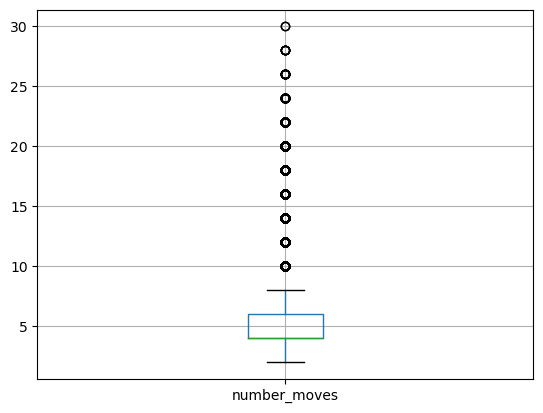

In [13]:
def num_moves(x):
    num_moves = len(x.split())
    return num_moves
data['number_moves'] = data["Moves"].apply(num_moves)

# 5 moves is the median number of puzzles overall
data.boxplot(column=['number_moves'])  

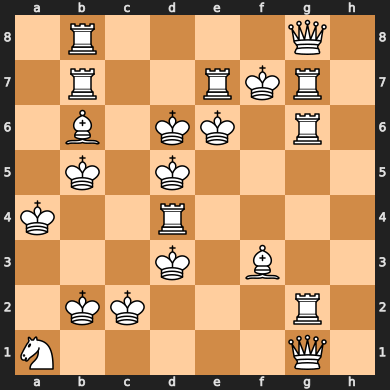

In [85]:
first_fen = data['FEN'][1]
board = chess.Board('1R4Q1/1R2RKR1/1B1KK1R1/1K1K4/K2R4/3K1B2/1KK3R1/N5Q1')
board